# Movie Analysis

In [30]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

We create a DataFrame using the [iMDB data](https://www.kaggle.com/code/payamamanat/imdb-movies/input) we found on Kaggle.

In [31]:
df = pd.read_csv("./data/imdb.csv")

Some columns are not processable since they are string values, so we convert them into numerical data.

In [32]:
df["duration"] = df["duration"].str.replace(" min", "", regex=False).astype(float)
df["year_start"] = df["year"].str.extract(r"(\d{4})").fillna(0).astype(int)

Also, we create a new column called `decade` so that we will be able to use it for grouping purposes.

In [33]:
df = df[~df["year_start"].isin([0])]
df["decade"] = (df["year_start"] // 10) * 10

Now, just to have an image in mind, we create a line plot to see the correlation between movies and the decade they were released.

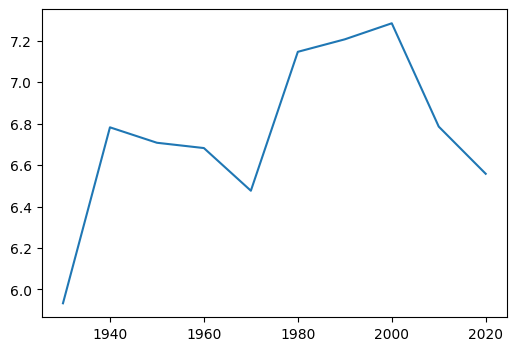

In [34]:
year_avg = df.groupby("decade")["rating"].mean().reset_index()
year_rating_fig, year_rating_ax = plt.subplots(figsize=[6, 4])
year_rating_ax.plot(year_avg["decade"], year_avg["rating"])
plt.show()

To analyze more, we check out what column have what kind of value.

In [35]:
print(df.dtypes)

title           object
year            object
certificate     object
duration       float64
genre           object
rating         float64
description     object
stars           object
votes           object
year_start       int64
decade           int64
dtype: object


Okay, so we can see that we still have a lot of objects, let's see if we can turn them into numerical or categorical values.

In [36]:
df["votes"]

0       177,031
1       199,885
2       501,384
3         9,773
4        15,413
         ...   
9952      3,130
9953    970,067
9954    199,898
9955    439,601
9956      9,786
Name: votes, Length: 9326, dtype: object

We can turn the entire `votes` column to integers.

In [37]:
df["votes_num"] = df["votes"].str.replace(",", "").fillna(0).astype(int)
print(f"{df["votes_num"]}\n")
print(df.dtypes)

0       177031
1       199885
2       501384
3         9773
4        15413
         ...  
9952      3130
9953    970067
9954    199898
9955    439601
9956      9786
Name: votes_num, Length: 9326, dtype: int64

title           object
year            object
certificate     object
duration       float64
genre           object
rating         float64
description     object
stars           object
votes           object
year_start       int64
decade           int64
votes_num        int64
dtype: object


Let's see if popularity and the iMDB rating is correlated.

In [38]:
df[['rating', "votes_num"]].corr()

,rating,votes_num
rating,1.000000,0.142622
votes_num,0.142622,1.000000


So we can roughly say that people will share their opinion even if the movie was great or not. Though we will share our opinion a tiny bit more if the movies was great.

In [42]:
df.sort_values(["rating", "votes"], ascending=[False, False]).head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes,year_start,decade,votes_num
9444,BoJack Horseman,(2014–2020),TV-MA,26.0,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066",2014,2010,16066
17,1899,(2022– ),NaN,60.0,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853,2022,2020,853
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25.0,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221",2005,2000,5221
9578,Stranger Things,(2016– ),TV-14,98.0,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276",2016,2010,36276
8907,Avatar: The Last Airbender,(2005–2008),TV-Y7,24.0,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953",2005,2000,3953
8259,Dexter,(2006–2013),TV-MA,56.0,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604",2006,2000,10604
8557,JoJo's Bizarre Adventure,(2012– ),TV-MA,25.0,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442",2012,2010,1442
9445,BoJack Horseman,(2014–2020),TV-MA,27.0,"Animation, Comedy, Drama",9.5,A celebration brings people together.,"['Aaron Long', '| ', ' Stars:', 'Will Arnet...","6,230",2014,2010,6230
8044,Avatar: The Last Airbender,(2005–2008),TV-Y7,25.0,"Animation, Action, Adventure",9.5,As Zuko tries to make it by in exile without h...,"['Lauren MacMullan', '| ', ' Stars:', 'Dant...","5,383",2005,2000,5383
9586,Avatar: The Last Airbender,(2005–2008),TV-Y7,25.0,"Animation, Action, Adventure",9.5,Both Aang and Zuko must learn the history of h...,"['Ethan Spaulding', '| ', ' Stars:', 'Zach ...","4,740",2005,2000,4740


We can see that movies with very low votes also pops up in our Top 10 chart. We have to solve that.